In [1]:
import pylab as plt
import numpy as np
import pandas as pd

# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import copy    

import scipy
from scipy import interpolate
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

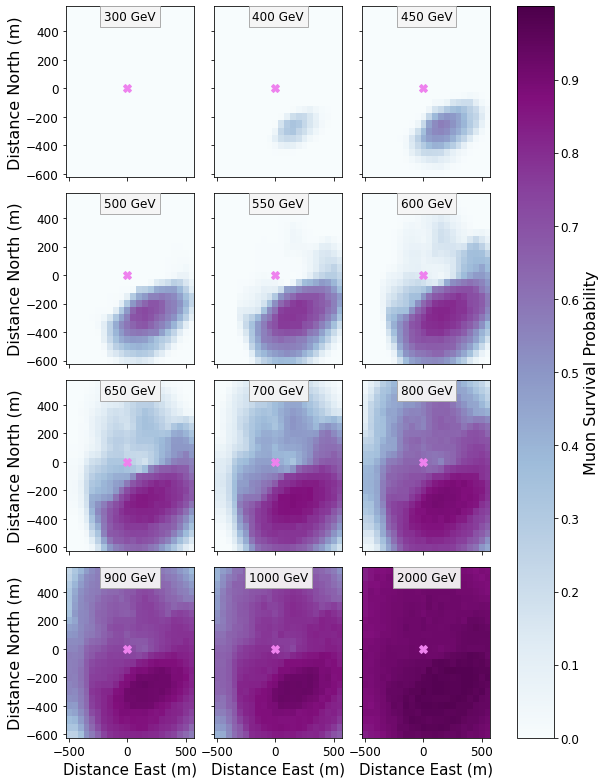

In [2]:
a=0

locs=[1,2,3,4,5,6,7,8,9,10,11,12]

energies=[250,500,750,1000,1500,4000,10000]
energies=[100,300,400,450,500,550,600,650,700,800,900,1000,2000,4000,6000]


spacing=50
NumToRun=1000
Xmin=-500-spacing
Xmax=1500+spacing/2
Ymin=-2255-spacing
Ymax=745+spacing/2

fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(8.5,11), sharex=True, sharey=True)
cmap = plt.get_cmap('BuPu')
for ax in axes.flat:
    LOC=locs[a]
    


    NRG=energies[LOC]

    with open('../Proposal/PROPOSALInterpFunctions/Proposal_Muons_interpolator'+str(NRG)+'GeV.pkl', 'rb') as f:
        PercentMuons = pickle.load(f)

    intexs=[]
    inteys=[]
    intepercs=[]
    for X in range(-500,600,spacing):
        for Y in range(-600,600,spacing):
            intexs.append(X)
            inteys.append(Y)
            intepercs.append(PercentMuons(X,Y))


    intepercs = np.array(intepercs)
    intepercs=intepercs.reshape(len(np.unique(intexs)), len(np.unique(inteys)))
            
    
    im=ax.pcolormesh(np.unique(intexs),np.unique(inteys),np.transpose(intepercs),cmap=cmap,shading='auto',vmin=0, vmax=1)
    #ax.set_ylim(Ymin,Ymax)
    #ax.set_xlim(Xmin,Xmax)
    ax.tick_params(axis='both', which='major', labelsize=12)


    #ax.title("Energy ="+str(energies[LOC]*GeV/10**6)+"TeV")
    ax.plot([0],[0],'X',label='Location of LSC',color='violet',markersize=8)
    
    ax.set_title(str(NRG)+' GeV', y=1, pad=-14,bbox=dict(facecolor='whitesmoke',alpha=.95, edgecolor='darkgray'))
    #ax.legend(loc='upper center',title=str(NRG)+'GeV',title_fontsize=12)

    if (LOC>9):
        ax.set_xlabel("Distance East (m)", fontsize=15)
    if ((LOC+2)%3==0):        
        ax.set_ylabel("Distance North (m)", fontsize=16)
    a+=1
fig.subplots_adjust(wspace=.05, hspace=.05)
fig.tight_layout()
cbar=fig.colorbar(im, ax=axes.ravel().tolist())
cbar.set_ticks(np.arange(0, 1, 0.1))
cbar.set_label('Muon Survival Probability', fontsize=16)
cbar.ax.tick_params(labelsize=12)
#fig.clim(0,1)


#fig.savefig("./SimulatedPercents.png",dpi=250,bbox_inches='tight')

#plt.show()